In [1]:
import seaborn as sns
from sklearn.cross_validation import train_test_split, cross_val_score
import pandas as pd


headers = [
            'mpg',
            'cylinders',
            'displacement',
            'horsepower',
            'weight',
            'acceleration',
            'model year',
            'origin',
            'car name',
          ]

data = pd.read_csv('auto-mpg.data', names=headers, na_values='?' ,sep='\\s+')
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
data = data.fillna(data.mean(axis=0))

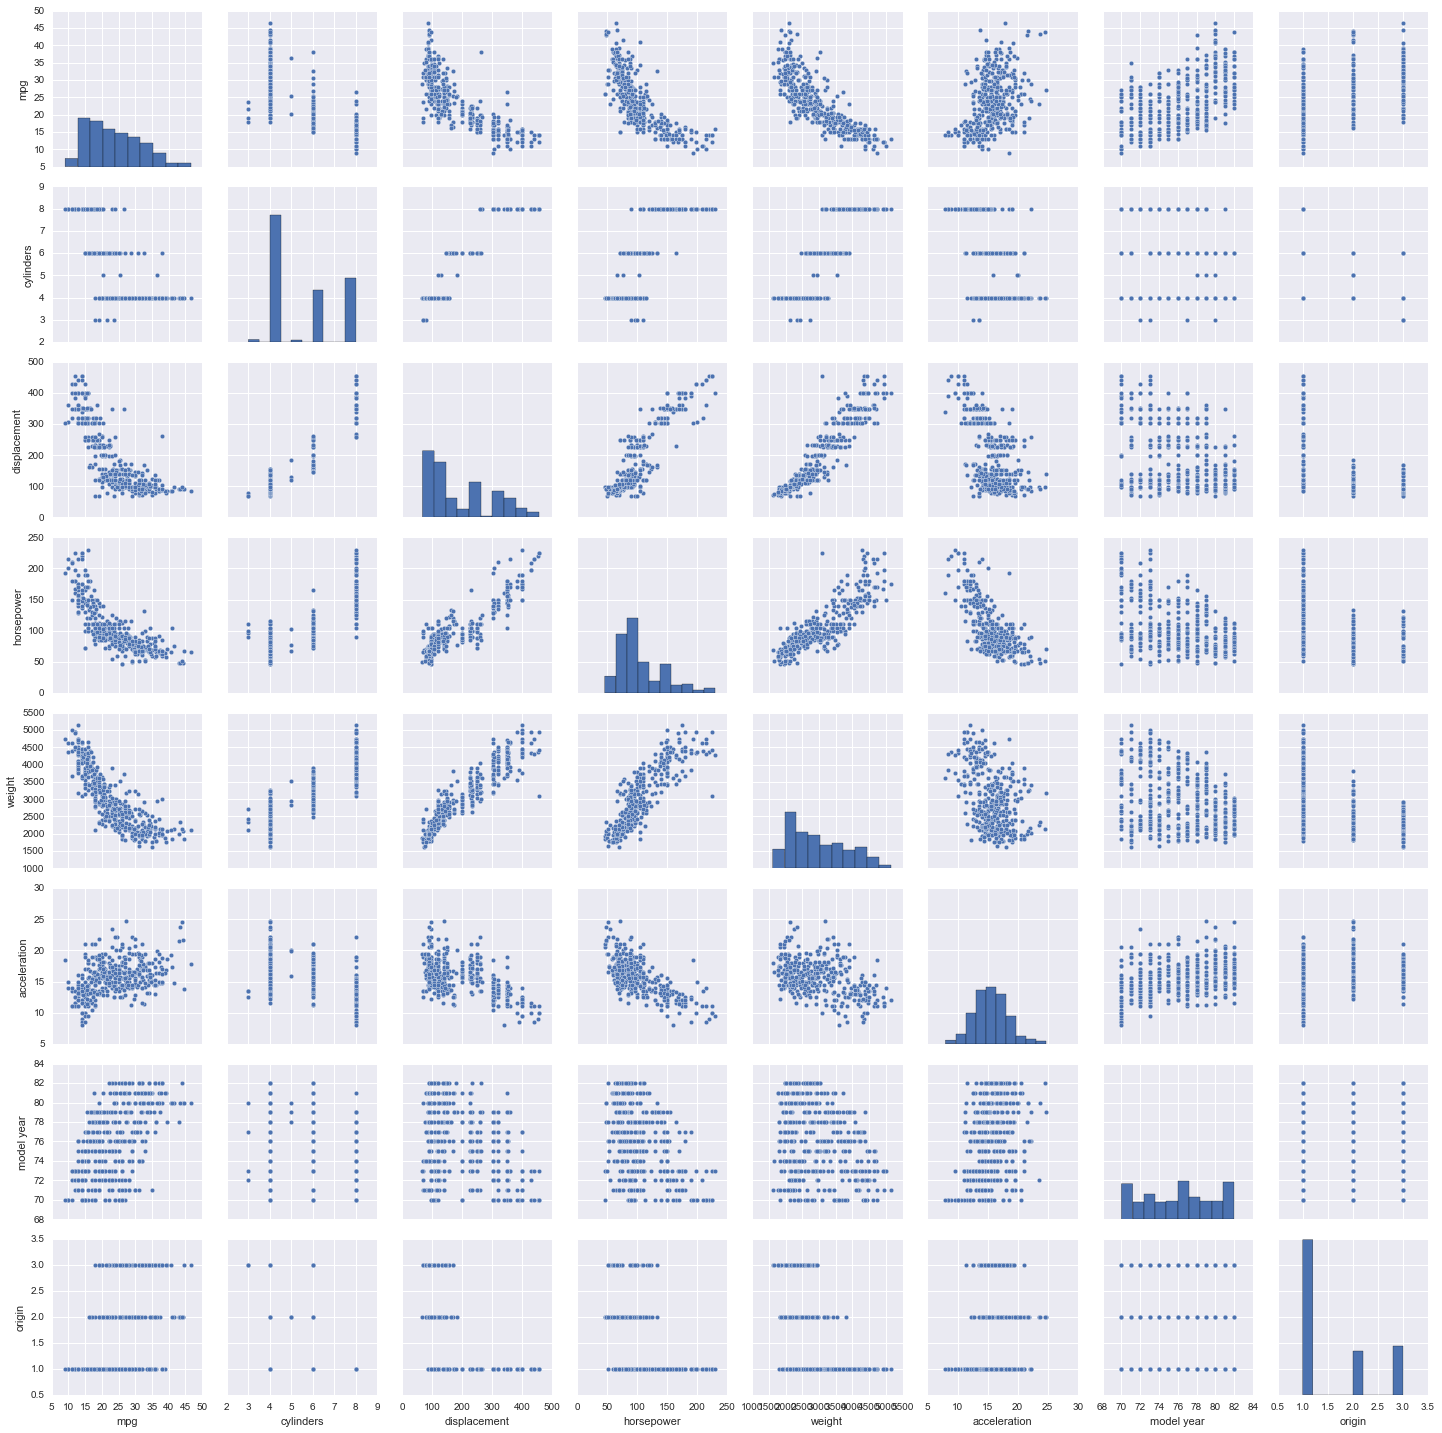

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

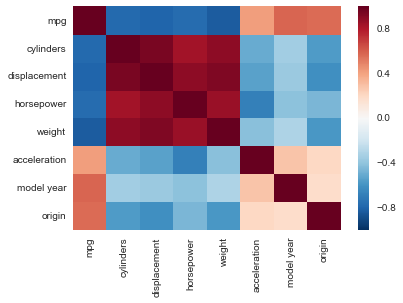

In [4]:
sns.heatmap(data.corr())

In [5]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data.ix[:, 'car name'] = enc.fit_transform(data.ix[:, 'car name'])

In [6]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161


In [7]:
y = data.mpg
X = data.drop(['mpg'], axis=1)

# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
data.ix[:, 'car name'].unique().shape

(305L,)

In [9]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

scores = cross_val_score(reg, X_train, y_train, cv=3)
print(scores)

[ 0.81968471  0.7692727   0.80181157]


In [10]:
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.83611853351986987

In [11]:
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV

param_grid = {
    'C': [0.5, 1.0],
    'epsilon': [0.1],
    'kernel': ['linear']
}

model = GridSearchCV(SVR(), param_grid=param_grid, cv=3, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'epsilon': [0.1], 'C': [0.5, 1.0], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [12]:
model.score(X_test, y_test)

0.78207214948744297